In [1]:
# リスト 5-4-(1)
import numpy as np
import matplotlib.pyplot as plt

# データのロード -----
data = np.load("ch5_data.npz")
X = data["X"]
X_min = 0
X_max = data["X_max"]
N = data["N"]
T = data["T"]

# モデル A -----
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)  # 式 5-71
    return y

# モデル A 表示 -----
def show_model_A(w):
    x = np.linspace(X_min, X_max, 100)
    y = model_A(x, w)
    plt.plot(x, y, "gray", linewidth=4)

# モデル A の平均二乗誤差（MSE） -----
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t) ** 2)   # 式 5-72
    return mse

In [2]:
# リスト 5-4-(2)
from scipy.optimize import minimize

# モデル A のパラメーターの最適化
def fit_model_A(w_init, x, t):
    res = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res.x

w0 = 169.04, w1 = 113.66, w2 = 0.22
SD = 3.86 cm


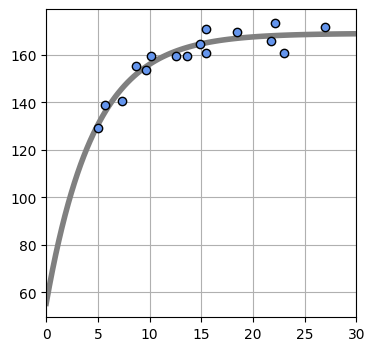

In [3]:
# リスト 5-4-(3)
# メイン -----
w_init = np.array([100.0, 0.0, 0.0])  # w の初期値
w = fit_model_A(w_init, X, T)         # w を計算
sd = np.sqrt(mse_model_A(w, X, T))    # SD を計算
# 結果表示
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}, w2 = {w[2]:.2f}")
print(f"SD = {sd:.2f} cm")

# グラフ描画 -----
plt.figure(figsize=(4, 4))
show_model_A(w)
plt.plot(
    X, T, "cornflowerblue",
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

Gauss(M=3) SD = 6.51 cm
Model A SD = 4.70 cm


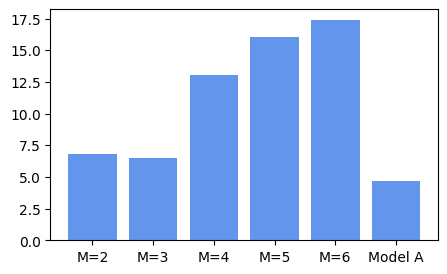

In [4]:
# リスト 5-4-(4)
# 交差検証 モデル A -----
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        # 訓練データとテストデータに分類
        i_test = np.fmod(range(n), k)
        x_test = x[i_test == i]
        t_test = t[i_test == i]
        x_train = x[i_test != i]
        t_train = t[i_test != i]
        # 精度を上げるため
        # リスト 5-4-(3) で得た値を初期値に設定
        w_init = np.array([169.04, 113.66, 0.22])
        w = fit_model_A(w_init, x_train, t_train)
        mse_train[i] = mse_model_A(w, x_train, t_train)
        mse_test[i] = mse_model_A(w, x_test, t_test)

    return mse_train, mse_test

# メイン -----
# model A の交差検定
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
sd_A_test = np.sqrt(np.mean(Cv_A_test))
# 線形基底関数モデルの交差検定の結果のロード
sd_Gauss_test = np.load("ch5_Gauss_test.npy")
# 結果のまとめ
SDs = np.append(sd_Gauss_test[0:5], sd_A_test)
# 結果表示
print(f"Gauss(M=3) SD = {sd_Gauss_test[1]:.2f} cm")
print(f"Model A SD = {sd_A_test:.2f} cm")

# グラフ描画 -----
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(
    M, SDs, facecolor="cornflowerblue", align="center",
    tick_label=label,
)
plt.show()
        

In [5]:
w = [169.04, 113.66, 0.22]
model_A(15.43, w)

165.22625542002046